# Guide for twinpy/analysis/shear_analyzer.py

In [1]:
%aiida
%reload_ext autoreload
%autoreload 2

In [57]:
import os
import sys
from pprint import pprint
import numpy as np
import twinpy
from twinpy.interfaces.aiida import AiidaShearWorkChain
from twinpy.analysis.shear_analyzer import ShearAnalyzer
from twinpy.plot.band_structure import (get_seekpath,
                                        get_labels_for_twin,
                                        get_band_paths_from_labels,
                                        get_labels_band_paths_from_seekpath,
                                        BandsPlot)

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

# shear_pk = 309999  # twinpy Mg_pv
shear_pk = 315857  # twinpy Ti_pv

# class ShearAnalyzer

In [51]:
aiida_shear = AiidaShearWorkChain(load_node(shear_pk))
analyzer = aiida_shear.get_analyzer()
show_info(analyzer, is_class=True)

====== START class information ======

# ---------
# docstring
# ---------

    Analize shear result.
    

# ----
# init
# ----

        Args:
            original_cells (list): primitivie original cells, which is output
                               cells of ShearStructure class
            input_cells (list): input cells for vasp
            relax_cells (list): relax cells of vasp

        Raises:
            RuntimeError: The number of atoms changes between original cells
                          and input cells, which is not supported.

        Todo:
            Currently not supported the case the number of original_cells
            and input_cells changes because it is difficult to construct
            the relax cells in the original frame. But future fix this
            problem. One solution is to make attribute
            'self._original_primitive' which contains two atoms
            in the unit cell and original basis.
        

# ---------------
# attribute names
# --

## def set_phonons

In [52]:
show_info(analyzer.set_phonons)
print("NOTE:")
print("# If you get ShearAnalyzer class object from AiidaShearWorkChain,")
print("# self._phonon is automatically set.")

====== START method information ======

# ---------
# docstring
# ---------

        Set phonons.
        

======= END method information =======


NOTE:
# If you get ShearAnalyzer class object from AiidaShearWorkChain,
# self._phonon is automatically set.


## def get_relax_diffs

In [53]:
show_info(analyzer.get_relax_diffs)
print("# length of data")
print(len(analyzer.get_relax_diffs()))
print("")
print("# first data")
pprint(analyzer.get_relax_diffs()[0])

====== START method information ======

# ---------
# docstring
# ---------

        Get structure diffs between input and relax cells
        IN ORIGINAL FRAME.
        

======= END method information =======


# length of data
10

# first data
{'cart_norm_diffs': array([[1.83158415e-08, 1.83158281e-08]]),
 'cart_posi_diffs': array([[[-1.58619985e-08,  9.15789578e-09,  0.00000000e+00],
        [ 1.58619655e-08, -9.15792597e-09, -4.44089210e-16]]]),
 'lattice_diffs': array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]]),
 'scaled_posi_diffs': array([[[-3.33333938e-09,  3.33332117e-09,  0.00000000e+00],
        [ 3.33332351e-09, -3.33333217e-09, -1.11022302e-16]]])}


## def shear_diffs

In [54]:
show_info(analyzer.get_shear_diffs)
print("# keys")
print(analyzer.get_shear_diffs().keys())
print("")
print("# data")
pprint(analyzer.get_shear_diffs())

====== START method information ======

# ---------
# docstring
# ---------

        Get structure diffs between original relax and sheared relax cells
        IN ORIGINAL FRAME.
        

======= END method information =======


# keys
dict_keys(['lattice_diffs', 'scaled_posi_diffs', 'cart_posi_diffs', 'cart_norm_diffs'])

# data
{'cart_norm_diffs': array([[0.        , 0.        ],
       [0.00835271, 0.0200704 ],
       [0.01695871, 0.04001049],
       [0.02575496, 0.05986814],
       [0.03483178, 0.07959811],
       [0.04444544, 0.09903739],
       [0.0544147 , 0.11832302],
       [0.06509133, 0.13728812],
       [0.07621424, 0.15609977],
       [0.08844219, 0.1744321 ]]),
 'cart_posi_diffs': array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00671125, 0.00387473, 0.00311662],
        [0.01075836, 0.00621136, 0.01576381]],

       [[0.01368215, 0.00789938, 0.00616413],
        [0.02125707, 0.01227279, 0.03159675]],

       [[0.02

## def get_band_paths

In [55]:
show_info(analyzer.get_band_paths)
cell = analyzer.relax_cells[0]
skp = get_seekpath(cell)
print("# You have to determine band paths for first cell.")
print("")
print("# twin labels")
pprint(get_labels_for_twin())
print("")
print("# seekpath output")
print("### path")
pprint(skp['path'])
print("")
print("### point coords")
pprint(skp['point_coords'])

# labels = ['GAMMA', 'M_2', 'L_2', 'A', '', 'GAMMA', 'K_2']
labels = ['GAMMA', 'M_1', 'L_1', 'A', '', 'GAMMA', 'K_1']
fixed_labels, band_paths = get_band_paths_from_labels(
                               labels=labels,
                               labels_qpoints=get_labels_for_twin())
print("")
print("Example:")
print("# labels")
print(labels)
print("")
print("# fixed labels")
print(fixed_labels)
print("")
print("# fixed labels, band_paths")
pprint(band_paths)

====== START method information ======

# ---------
# docstring
# ---------

        Get band paths for all shear cells from band paths for first cell.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.

        Examples:
            >>> base_band_paths = [[[  0, 0, 0.5],
                                    [  0, 0, 0  ]],
                                   [[0.5, 0,   0],
                                    [0.5, 0, 0.5],
                                    [  0, 0, 0.5]]]

        Note:
            Get path_connections for each shear structure considering
            structure body rotation.
        

======= END method information =======


# You have to determine band paths for first cell.

# twin labels
{'A': [0, 0, 0.5],
 'GAMMA': [0, 0, 0],
 'H_1': [0.3333333333333333, 0.3333333333333333, 0.5],
 'H_2': [-0.3333333333333333, 0.6666666666666666, 0.5],
 'K_1': [0.3333333333

## def get_band_structures

====== START method information ======

# ---------
# docstring
# ---------

        Get BandStructure objects.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.
            labels (list): Band labels for first band paths.
            npoints (int): The number of qpoints along the band path.
            with_eigenvectors (bool): If True, compute eigenvectors.

        Notes:
            Reciprocal lattices for each structure are set automatically.
            For more detail, see 'get_band_qpoints_and_path_connections'
            in phonopy.phonon.band_structure.
        

======= END method information =======




(<Figure size 576x432 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7fc03ad5a550>])

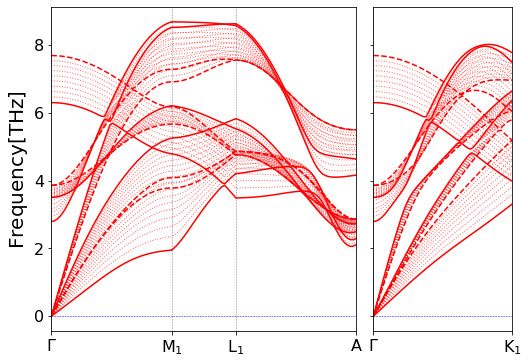

In [56]:
show_info(analyzer.get_band_structures)
band_structures = analyzer.get_band_structures(
    base_band_paths=band_paths,
    labels=fixed_labels,
    npoints=51,
    with_eigenvectors=False)
BandsPlot(band_structures).plot_band_structures()